# Time Series Forecasting (LSTM)

In [1]:
# Stock Market Prediction and Forecasting using LSTM method

In [2]:
import pandas_datareader as pdr

In [3]:
key = '---------9f867cb-------------------'

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key = key)

C:\Users\sagar\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv('AAPL1.csv')

In [7]:
import pandas as pd
df = pd.read_csv('AAPL1.csv')
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-02-04 00:00:00+00:00,172.39,174.1000,170.68,171.68,82465400,172.39,174.1000,170.68,171.68,82465400,0.22,1.0
1255,AAPL,2022-02-07 00:00:00+00:00,171.66,173.9458,170.95,172.86,77251204,171.66,173.9458,170.95,172.86,77251204,0.00,1.0
1256,AAPL,2022-02-08 00:00:00+00:00,174.83,175.3500,171.43,171.73,74829217,174.83,175.3500,171.43,171.73,74829217,0.00,1.0
1257,AAPL,2022-02-09 00:00:00+00:00,176.28,176.6500,174.90,176.05,71285038,176.28,176.6500,174.90,176.05,71285038,0.00,1.0
1258,AAPL,2022-02-10 00:00:00+00:00,172.12,175.4800,171.55,174.14,90865899,172.12,175.4800,171.55,174.14,90865899,0.00,1.0


In [105]:
len(df)

1259

In [11]:
df1 = df.reset_index()['close']

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-13 00:00:00+00:00,133.290,133.82,132.7500,133.08,23035421,31.456950,31.582032,31.329508,31.407389,92141684,0.0,1.0
1,AAPL,2017-02-14 00:00:00+00:00,135.020,135.09,133.2500,133.47,33226223,31.865237,31.881757,31.447510,31.499431,132904892,0.0,1.0
2,AAPL,2017-02-15 00:00:00+00:00,135.510,136.27,134.6200,135.52,35623100,31.980878,32.160241,31.770835,31.983239,142492400,0.0,1.0
3,AAPL,2017-02-16 00:00:00+00:00,135.345,135.90,134.8398,135.67,22584555,31.941938,32.072920,31.822709,32.018639,90338220,0.0,1.0
4,AAPL,2017-02-17 00:00:00+00:00,135.720,135.83,135.1000,135.10,22198197,32.030439,32.056400,31.884117,31.884117,88792788,0.0,1.0


In [13]:
df1

0       133.290
1       135.020
2       135.510
3       135.345
4       135.720
         ...   
1254    172.390
1255    171.660
1256    174.830
1257    176.280
1258    172.120
Name: close, Length: 1259, dtype: float64

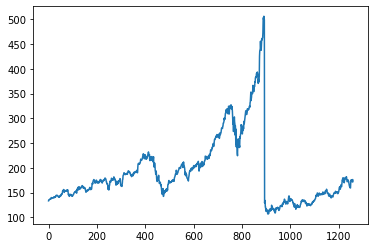

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
np.array(df1).reshape(-1,1)

array([[133.29],
       [135.02],
       [135.51],
       ...,
       [174.83],
       [176.28],
       [172.12]])

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [94]:
d= pd.DataFrame(df1)

In [96]:
d

,0
0,0.066249
1,0.070582
2,0.071810
3,0.071396
4,0.072336
...,...
1254,0.164183
1255,0.162354
1256,0.170294
1257,0.173926


In [27]:
# splitting the data into train and test
training_size = int(len(df1)*0.65)
test_size = int(len(df1) - training_size)
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [28]:
training_size,test_size

(818, 441)

In [29]:
train_data

array([[0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.088

In [30]:
test_data

array([[5.07701941e-01],
       [5.03118347e-01],
       [5.21277395e-01],
       [5.16718848e-01],
       [5.31972448e-01],
       [5.26011271e-01],
       [5.31120852e-01],
       [5.25710708e-01],
       [5.29167188e-01],
       [5.29517846e-01],
       [5.28741390e-01],
       [5.38534753e-01],
       [5.42266750e-01],
       [5.46725110e-01],
       [5.39711960e-01],
       [5.62705072e-01],
       [5.67614277e-01],
       [5.93988729e-01],
       [6.16155291e-01],
       [5.73725736e-01],
       [5.80989355e-01],
       [5.91484033e-01],
       [6.14251722e-01],
       [6.13024421e-01],
       [6.13375078e-01],
       [6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],
       [6.65873513e-01],
       [6.87614277e-01],
       [6.91721979e-01],
       [6.93400125e-01],


In [87]:
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0] # 0 to 1,1 to 2,2 to 3
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)    

In [97]:
import numpy
time_step = 4
x_train,y_train =  create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [98]:
print(x_train.shape)
print(y_train.shape)

(813, 4)
(813,)


In [99]:
pd.DataFrame(x_train)

,0,1,2,3
0,0.066249,0.070582,0.071810,0.071396
1,0.070582,0.071810,0.071396,0.072336
2,0.071810,0.071396,0.072336,0.074790
3,0.071396,0.072336,0.074790,0.075817
4,0.072336,0.074790,0.075817,0.074364
...,...,...,...,...
808,0.468278,0.456431,0.466675,0.477696
809,0.456431,0.466675,0.477696,0.485385
810,0.466675,0.477696,0.485385,0.493175
811,0.477696,0.485385,0.493175,0.509180


In [100]:
pd.DataFrame(y_train)

,0
0,0.072336
1,0.074790
2,0.075817
3,0.074364
4,0.074690
...,...
808,0.485385
809,0.493175
810,0.509180
811,0.521403


In [76]:
print(x_test.shape)
print(y_test.shape)

(435, 5)
(435,)


In [64]:
print(len(train_data))
print(len(test_data))

818
441


In [43]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [44]:
x_train

array([[[0.06624922],
        [0.07058234],
        [0.07180964],
        ...,
        [0.09182217],
        [0.09329994],
        [0.08989355]],

       [[0.07058234],
        [0.07180964],
        [0.07139637],
        ...,
        [0.09329994],
        [0.08989355],
        [0.09352536]],

       [[0.07180964],
        [0.07139637],
        [0.07233563],
        ...,
        [0.08989355],
        [0.09352536],
        [0.09572949]],

       ...,

       [[0.42156544],
        [0.43336255],
        [0.43474014],
        ...,
        [0.47769568],
        [0.4853851 ],
        [0.4931747 ]],

       [[0.43336255],
        [0.43474014],
        [0.43306199],
        ...,
        [0.4853851 ],
        [0.4931747 ],
        [0.50917971]],

       [[0.43474014],
        [0.43306199],
        [0.43376331],
        ...,
        [0.4931747 ],
        [0.50917971],
        [0.52140263]]])

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
#from tensorflow.keras.layers import LSTM

In [47]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape =(100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 13s 406ms/step - loss: 0.0181 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 3s 261ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
12/12 [==============================] - 3s 292ms/step - loss: 0.0012 - val_loss: 3.0820e-04
Epoch 5/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0011 - val_loss: 2.7091e-04
Epoch 6/100
12/12 [==============================] - 3s 246ms/step - loss: 0.0010 - val_loss: 4.3472e-04
Epoch 7/100
12/12 [==============================] - 3s 237ms/step - loss: 9.5779e-04 - val_loss: 3.6841e-04
Epoch 8/100
12/12 [==============================] - 3s 249ms/step - loss: 9.1063e-04 - val_loss: 2.6283e-04
Epoch 9/100
12/12 [==============================] - 3s 284ms/step - loss: 8.6868e-04 - val_loss: 2.5091e-04
Epoch 10/100
12/12 [==============================] - 

Epoch 76/100
12/12 [==============================] - 3s 236ms/step - loss: 3.1021e-04 - val_loss: 1.8007e-04
Epoch 77/100
12/12 [==============================] - 3s 236ms/step - loss: 3.2459e-04 - val_loss: 1.6269e-04
Epoch 78/100
12/12 [==============================] - 3s 264ms/step - loss: 3.3501e-04 - val_loss: 2.0241e-04
Epoch 79/100
12/12 [==============================] - 3s 244ms/step - loss: 3.2782e-04 - val_loss: 1.5833e-04
Epoch 80/100
12/12 [==============================] - 3s 237ms/step - loss: 3.0343e-04 - val_loss: 1.8071e-04
Epoch 81/100
12/12 [==============================] - 3s 241ms/step - loss: 3.2413e-04 - val_loss: 1.5917e-04
Epoch 82/100
12/12 [==============================] - 3s 241ms/step - loss: 2.9755e-04 - val_loss: 1.5492e-04
Epoch 83/100
12/12 [==============================] - 3s 242ms/step - loss: 3.0181e-04 - val_loss: 1.9947e-04
Epoch 84/100
12/12 [==============================] - 3s 238ms/step - loss: 3.1669e-04 - val_loss: 1.4860e-04
Epoch 85/1

In [50]:
# prediction
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [51]:
# transform back into original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [52]:
test_predict

array([[125.89568 ],
       [125.97719 ],
       [125.87166 ],
       [125.64254 ],
       [125.43084 ],
       [125.63349 ],
       [126.099846],
       [126.66171 ],
       [127.16224 ],
       [127.43202 ],
       [127.2877  ],
       [126.843185],
       [126.19491 ],
       [125.394264],
       [124.49337 ],
       [123.5736  ],
       [122.78268 ],
       [121.9035  ],
       [121.1241  ],
       [120.20208 ],
       [119.12945 ],
       [118.076   ],
       [117.36417 ],
       [117.24848 ],
       [117.648575],
       [118.257126],
       [118.85642 ],
       [119.51205 ],
       [120.17996 ],
       [120.803055],
       [121.38713 ],
       [121.86235 ],
       [122.13334 ],
       [122.23394 ],
       [122.14614 ],
       [121.7392  ],
       [121.140625],
       [120.519424],
       [119.99937 ],
       [119.74601 ],
       [119.94368 ],
       [120.54487 ],
       [121.386024],
       [122.26492 ],
       [123.130424],
       [123.95262 ],
       [124.54976 ],
       [124.9

In [53]:
# Calculate RMSE Performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

207.2863029508957

In [54]:
math.sqrt(mean_squared_error(y_test,test_predict))

141.29871182847282

In [57]:
len(train_predict)

717

In [60]:
len(test_predict)

340

In [104]:
len(df1)

1259

In [103]:
len(np.empty_like(df1))

1259

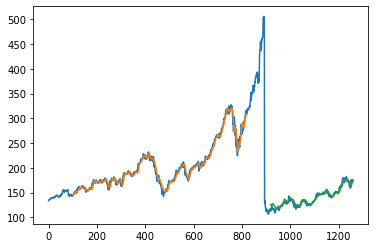

In [109]:
# Visualing Time Series

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back,:] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) - 1] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [56]:
trainPredictPlot

array([[1.35379956e-311],
       [1.35379999e-311],
       [1.35379961e-311],
       ...,
       [9.28391956e+242],
       [6.02202242e+175],
       [4.96153964e+247]])

In [59]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [62]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [63]:
temp_input

[0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.1366812773